In [7]:
# add path to explore_by_example src folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# import usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# our system imports
from aideme.active_learning import *
from aideme.initial_sampling import StratifiedSampler
from aideme.explore import *
from aideme.utils.metrics import three_set_metric, classification_metrics
from aideme.utils.plotting import plot_polytope

%matplotlib inline

In [8]:
def plot_fscore(metrics):
    df_list = [pd.DataFrame.from_dict({i: metric for i, metric in enumerate(ls)}, orient='index') for ls in metrics]
    avg = sum([df['fscore'][~df['fscore'].isna()] for df in df_list]) / len(df_list)
    avg.plot(ylim=[0,1], marker='o')
    plt.show()

selectivity : 0.121 %


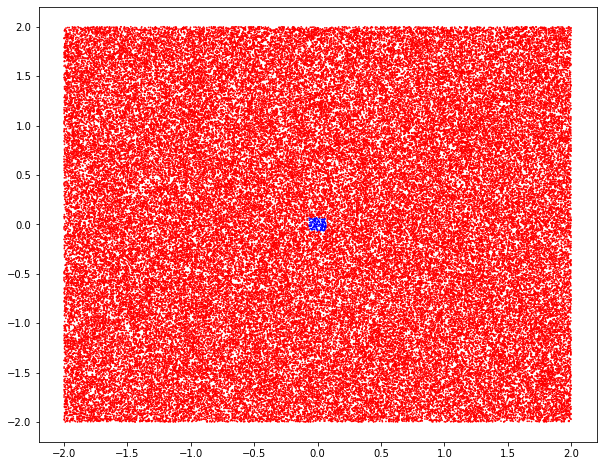

In [9]:
# DUMMY DATA
limit = 0.067 #0.067
X = np.random.uniform(low=-2, high=2, size=(100000, 2))  # do not forget to standardize the data. For this distribution, it should be fine without it.
y_subspace = np.vstack([np.abs(X[:, 0]) < limit, np.abs(X[:, 1]) < limit]).T.astype('float')  # partial labels (for each subspace)
y = y_subspace.min(axis=1)

# visualize data distribution
print('selectivity :', 100 * y.sum() / len(y), '%')

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], s=0.5, c=['b' if lb else 'r' for lb in y])
plt.show()

# NO FACTORIZATION EXAMPLE

In [27]:
import pickle as p
entities = p.load(open('/home/bastien/Projet_Yanlei/uptodate/aideme/data/kaggle_jobs_entities.p','rb'))
# df_backtrad = pd.DataFrame(np.array(backtrad).reshape(len(backtrad),-1))  
# bert = p.load(open('representation_bert.p','rb'))
# df_bert = pd.DataFrame(np.concatenate(np.array(bert)).reshape(len(bert), -1))


In [29]:
entities.head(10)

,PER,ORG,LOC,MISC,PER_emb,ORG_emb,LOC_emb,MISC_emb,Description,index
0,[],"[(Business Analyst, 24, 41), (ESI, 153, 157), ...",[],"[(Account Management and Implementation, 1115,...",[],"[[[0.16258799, 0.197888, -0.12089371, 0.081807...",[],"[[[0.118906565, 0.09946456, -0.02138752, 0.017...","POSITION SUMMARY, The Business Analyst role...",0
1,[],"[(Statistics, Applied Mathematics, Operations ...",[],[],[],"[[[0.06174811, 0.075685404, 0.026374565, -0.24...",[],[],"What do we need?, You to have an amazing pe...",1
2,[],"[(Statistics, Decision Sciences, Economics, Ph...",[],"[(SQL, Python, 874, 886)]",[],"[[[0.07148982, 0.18812478, -0.0022845655, -0.2...",[],"[[[0.26346013, -0.07656238, -0.04960102, -0.05...","Validate, analyze, and conduct statistical ana...",2
3,[],"[(Data Scientists, 299, 315), (CIA's, 460, 466...","[(Washington, DC, 10, 25), (US, 103, 106), (US...","[(CIA,, 256, 261), (Graduate Studies Program, ...",[],"[[[0.11599069, -0.029354377, -0.30888873, -0.4...","[[[0.019097436, 0.18673183, 0.047558255, -0.20...","[[[-0.30082646, 0.23165354, -0.057494372, -0.0...","Full time, Washington, DC metro area, Starting...",3
4,[],"[(Human Capital Management, 1724, 1749)]",[],[],[],"[[[-0.10789558, -0.054660857, -0.1045598, -0.7...",[],[],Assist in consultations with business partners...,4
5,[],[],[],"[(Americans, 1084, 1094)]",[],[],[],"[[-0.10115093, 0.05683236, 0.22057217, -0.2233...",Collecting and combining data from multiple so...,5
6,[],[],[],[],[],[],[],[],,6
7,[],"[(OM Partners, 20, 32), (Data Scientist, 555, ...","[(Wommelgem., 3444, 3455)]","[(English, 3208, 3216), (German)., 3219, 3228)...",[],"[[[0.034929097, 0.09205706, -0.08357909, -0.06...",[[]],"[[], [], []]","With demand sensing, OM Partners is breaking t...",7
8,[],[],[],"[(UNIX/LINUX,, 287, 299)]",[],[],[],"[[[0.189608, -0.1976325, 0.08125559, -0.376081...",Masters degree in Bioinformatics or three year...,8
9,[],"[(National Geospatial-Intelligence Agency's, 5...","[(U.S., 1946, 1951), (U.S., 10909, 10914)]","[(NGA,, 1849, 1854), (Counterintelligence Poly...",[],"[[[-0.15202662, 0.122248694, 0.02772708, 0.261...","[[[-0.026205817, 0.43251854, -0.056827035, 0.0...","[[[-0.1349187, -0.019167678, -0.15783599, 0.19...",Duties Summary JOB DESCRIPTION: Data Scie...,9


In [19]:
import os
# os.chdir('data')
with open('descriptions.txt') as file:
    file1 = file.readlines()
with open('description_backtrad.txt') as file:
    file2 = file.readlines()


In [25]:
df_backtrad[0] == df_bert[0]

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7       False
8        True
9       False
10       True
11       True
12      False
13       True
14      False
15      False
16      False
17      False
18       True
19       True
20      False
21       True
22       True
23       True
24       True
25       True
26      False
27      False
28      False
29      False
        ...  
5685     True
5686     True
5687     True
5688     True
5689     True
5690     True
5691    False
5692     True
5693    False
5694     True
5695     True
5696     True
5697    False
5698    False
5699    False
5700     True
5701    False
5702     True
5703     True
5704     True
5705     True
5706    False
5707     True
5708     True
5709     True
5710     True
5711     True
5712    False
5713    False
5714     True
Name: 0, Length: 5715, dtype: bool

In [22]:
file2[0]

'TOTAL POSITION: The role of business analyst is the main architect of reporting and dashboard solutions for internal and external customers. Using ESI development tools, this position is responsible for designing, developing, implementing, analyzing, interpreting and communicating business information based on the needs of individual customers. The ability to balance aesthetics with robust and intuitive functionality is a key prerequisite for success in this position. , ESSENTIAL FUNCTIONS, successfully design and implement external customer data reporting and dashboard solutions with a strong focus on product aesthetics and functionality. Help with the conception, development and implementation of new product ideas for external and internal customers. Manage Live and Data Warehouse Business Objects Universes; add new fields, change table connections, implement data structures that streamline report extraction and data analysis. Development and documentation of best practices for all 

iter: 0, fscore: 0.003183023872679045, tsm: 0.0
iter: 10, fscore: 0.03909590714722053, tsm: 0.0
iter: 20, fscore: 0.07314285714285715, tsm: 0.0
iter: 30, fscore: 0.5021645021645021, tsm: 9.42847714379999e-05
iter: 40, fscore: 0.33488372093023255, tsm: 0.0005212179125222604
iter: 50, fscore: 0.7804878048780488, tsm: 0.0016641572232348046
iter: 60, fscore: 0.7486631016042781, tsm: 0.017790262172284643
iter: 70, fscore: 0.86, tsm: 0.3121951219512195
iter: 80, fscore: 0.8370044052863436, tsm: 0.4866666666666667
iter: 90, fscore: 0.912621359223301, tsm: 0.6693548387096774
iter: 99, fscore: 0.9261083743842364, tsm: 0.7699115044247787


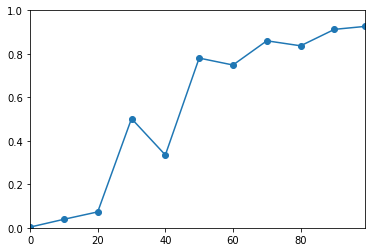

In [4]:
# SET-UP EXPLORATION CONFIGURATION
NUMBER_OF_ITERATIONS = 100  # number of points to be labeled by the user
SUBSAMPLING = float('inf') #10000, 50000, float('inf')
INITIAL_SAMPLER = StratifiedSampler(pos=1, neg=1)  # start with one random positive sample and one random negative sample
CALLBACK = [ # callback functions to be called at the end of each iteration
    classification_metrics('fscore'), 
    three_set_metric,
]
CALLBACK_SKIP = 10
PRINT_CALLBACK_RESULT = True

explore = PoolBasedExploration(NUMBER_OF_ITERATIONS, INITIAL_SAMPLER, SUBSAMPLING, CALLBACK, CALLBACK_SKIP, PRINT_CALLBACK_RESULT)

# CHOOSE AN ALGORITHM
#learner = RandomSampler(SVC(C=1e5, kernel='rbf', gamma='auto'))  # choose a random point
learner = SimpleMargin(C=1024, kernel='rbf')  # choose point closest to SVM decision boundary
#learner = KernelQueryByCommittee(kernel='rbf', sampling='deterministic', n_samples=8, warmup=1000, thin=100, rounding=True)  # version space algorithm
learner = DualSpaceModel(learner, sample_unknown_proba=0.5, mode='positive')  # Dual Space model


# RUN EXPLORATION
metrics = explore.run(X, y, learner, repeat=1)  # 'repeat' specifies how many times to repeat the exploration process

# COMPUTE AVERAGE F-SCORE OVER ALL REPEATS AND PLOT
plot_fscore(metrics)

# FACTORIZATION EXAMPLE

iter: 0, fscore: 0.00337802174601499, tsm: 0.0


/home/bastien/Projet_Yanlei/uptodate/aideme/aideme/active_learning/dsm/dsm.py:42: UserWarning: Found conflicting point in polytope model. is_valid = True
  warnings.warn("Found conflicting point in polytope model. is_valid = {0}".format(self.polytope_model.is_valid))


iter: 5, fscore: 0.033287101248266296, tsm: 0.0


/home/bastien/Projet_Yanlei/uptodate/aideme/aideme/active_learning/dsm/dsm.py:42: UserWarning: Found conflicting point in polytope model. is_valid = True
  warnings.warn("Found conflicting point in polytope model. is_valid = {0}".format(self.polytope_model.is_valid))


iter: 10, fscore: 0.08458864426419467, tsm: 0.0
iter: 15, fscore: 0.11194029850746269, tsm: 0.009855951478392721
iter: 20, fscore: 0.14056939501779359, tsm: 0.02662993572084481
iter: 25, fscore: 0.18256410256410258, tsm: 0.04814004376367615
iter: 30, fscore: 0.23684210526315788, tsm: 0.06205923836389281
iter: 35, fscore: 0.2996845425867508, tsm: 0.07807308970099668
iter: 40, fscore: 0.4824120603015075, tsm: 0.12668463611859837
iter: 45, fscore: 0.6643356643356644, tsm: 0.35233160621761656
iter: 49, fscore: 0.8430493273542601, tsm: 0.5637583892617449


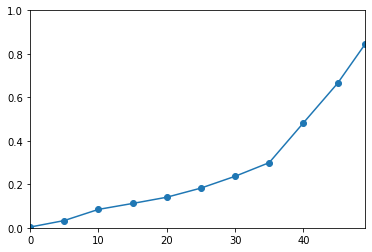

In [5]:
# SET-UP EXPLORATION CONFIGURATION
NUMBER_OF_ITERATIONS = 50
SUBSAMPLING = float('inf')
INITIAL_SAMPLER = StratifiedSampler(pos=1, neg=1)
CALLBACK = [
    classification_metrics('fscore'), 
    three_set_metric, 
    # plot_polytope(), # plot the positive / negative / unknown regions
]
CALLBACK_SKIP = 5
PRINT_CALLBACK_RESULT = True

explore = PoolBasedExploration(NUMBER_OF_ITERATIONS, INITIAL_SAMPLER, SUBSAMPLING, CALLBACK, CALLBACK_SKIP, PRINT_CALLBACK_RESULT)

# SUBSPATIAL LEARNER - run Simple Margin in each subspace
#subspatial_active_learners = [
#    KernelQueryByCommittee(kernel='rbf', n_samples=8, warmup=100, thin=10, sampling='deterministic'),
#    KernelQueryByCommittee(kernel='rbf', n_samples=8, warmup=100, thin=10, sampling='deterministic'),
#]

#learner = SubspaceLearner(
#    partition=[[0], [1]],  # partition of attributes (one subspace with the attribute 0, and another with 1)
#    learners=subspatial_active_learners, 
#    #label_function='AND', probability_function='min', ranking_function='square'
#)

# FACTORIZED DSM
learner = DualSpaceModel(SimpleMargin(C=1024, kernel='rbf'), mode='persist', sample_unknown_proba=0.5, partition=[[0], [1]])  # Dual Space model


# RUN EXPLORATION
metrics = explore.run(X, y_subspace, learner, repeat=1)  # use y_subspace here

# COMPUTE AVERAGE F-SCORE OVER ALL REPEATS AND PLOT
plot_fscore(metrics)